In [1]:
import json
eval_filename = 'KPGrouping5000.json'
with open(eval_filename) as f:
    data = json.load(f)
import os

In [2]:
from PIL import Image, ImageDraw

In [8]:
filename = "fb2ebd179d2715f604e18d2aa0ed08f2_d3d3LnN0YXRpc3RpcXVlcy5kZXZlbG9wcGVtZW50LWR1cmFibGUuZ291di5mcgkzNy4yMzUuODkuMTA3.xls-0-0.png"
#filename = "fa8527e1883a153f7101c6882c7ba16e_d3d3LmhwYy5nby50aAkxMjIuMTU0LjczLjI2-2-0.png"
#filename = "c4c0627d16eb05af88880a92faec6aaa_amFyY2hpdmVzLmNvbQkxOTIuMTg1Ljk4LjE5OA==-5-0.png"

In [11]:
img_dir = './'
im = Image.open(img_dir+filename)
draw = ImageDraw.Draw(im)
keys = data[filename][0]['3']
cens = data[filename][1]['3']
if 'Group' in eval_filename:
    groups = data[filename][2]
    for group in groups:
        # 提取分组中的中心点坐标。
        cen_in_group = group[0:2]
        # 遍历分组中的关键点。
        for k in range(1, len(group[:-1])//2):
            key_in_group = group[2*k:2*k+2]
            draw.line([tuple(cen_in_group),tuple(key_in_group)], fill ="blue", width = 1)
for bbox in keys:
    if bbox[0] > 0.4:
        draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
for bbox in cens:
    if bbox[0] > 0.4:
        draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))


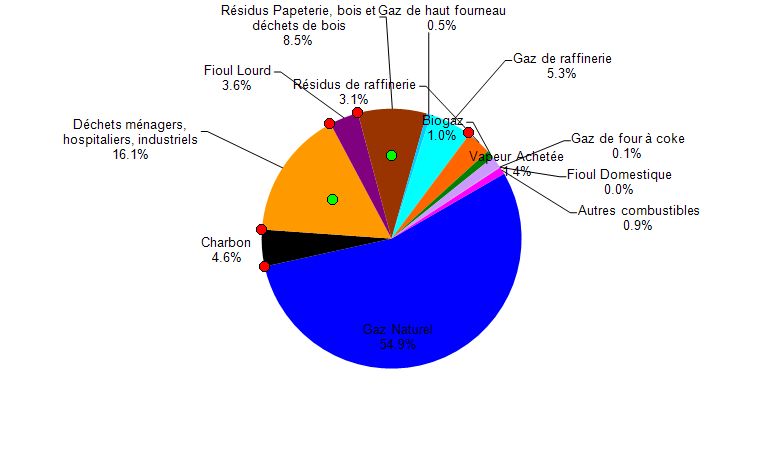

In [12]:
im